In [1]:
import pandas as pd 
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from tensorflow.keras import layers
from tensorflow.python.keras.metrics import accuracy 

mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28,28)))
model.add(tf.keras.layers.Dense(units = 128,activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(units = 128,activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(units = 10,activation = tf.nn.softmax))
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])
model.fit(x_train,y_train , epochs = 3)

loss,accuracy = model.evaluate(x_test,y_test)
print(accuracy)
print(loss)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2654 - accuracy: 0.9225
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1097 - accuracy: 0.9662
Epoch 3/3
313/313 [==============================] - 0s 1ms/step - loss: 0.0918 - accuracy: 0.9723
0.9722999930381775
0.09175732731819153


1/1 [==============================] - 0s 17ms/step
----------------------
The predicted value is:  1
----------------------


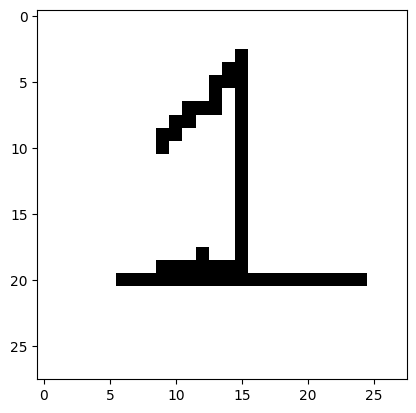

1/1 [==============================] - 0s 16ms/step
----------------------
The predicted value is:  6
----------------------


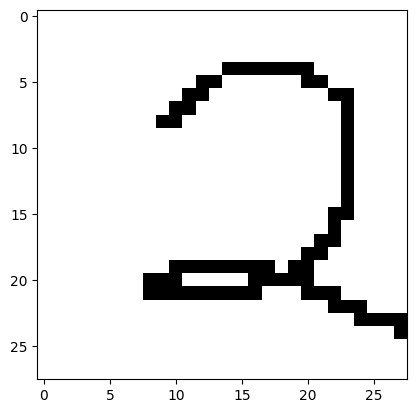

1/1 [==============================] - 0s 16ms/step
----------------------
The predicted value is:  3
----------------------


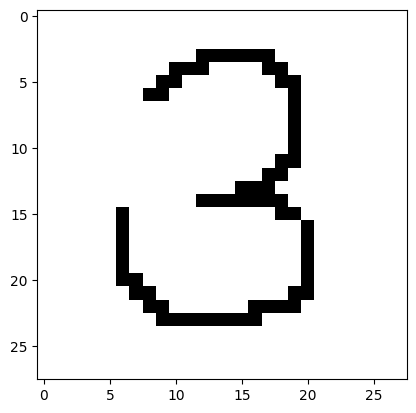

1/1 [==============================] - 0s 17ms/step
----------------------
The predicted value is:  4
----------------------


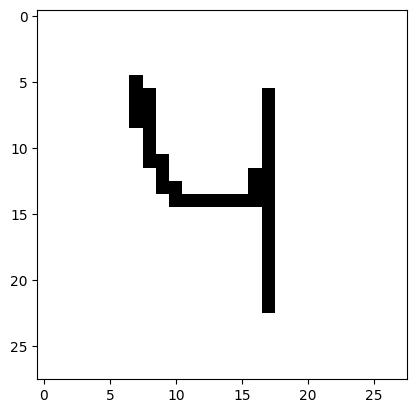

1/1 [==============================] - 0s 19ms/step
----------------------
The predicted value is:  5
----------------------


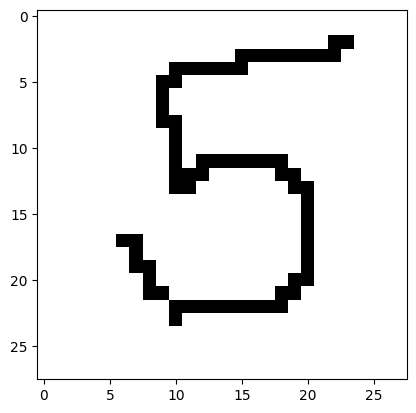

In [11]:
for x in range(1,6):
    img = cv.imread(f'{x}.png')[:,:,0]
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    print("----------------------")
    print("The predicted value is: ",np.argmax(prediction))
    print("----------------------")
    plt.imshow(img[0],cmap = plt.cm.binary)
    plt.show()